In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1=pd.read_csv('user_interactions.csv', encoding='unicode_escape')
df2=pd.read_csv('purchase_data.csv', encoding='unicode_escape')
df3=pd.read_csv('website_performance.csv', encoding='unicode_escape')

In [93]:
df1.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,User_3198,Homepage,560
1,User_126,Category Page,168
2,User_1376,Category Page,122
3,User_1117,Cart Page,329
4,User_3683,Category Page,391


Doing cleaninf and preprocessing user_interactions.csv

In [4]:
df1.shape


(5000, 3)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [129]:
df1.isnull().sum()
#no null value is found in this data set

User_ID               0
Page_Viewed           0
Time_Spent_Seconds    0
dtype: int64

In [130]:
#changing the user id of the data to just number and removing the word 'User' from the data
df1['User_ID'] = df1['User_ID'].str.extract(r'(\d+)')

AttributeError: Can only use .str accessor with string values!

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             5000 non-null   object
 1   Page_Viewed         5000 non-null   object
 2   Time_Spent_Seconds  5000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [95]:
df1.sample(10)

,User_ID,Page_Viewed,Time_Spent_Seconds
2790,1014,Category Page,106
3768,2675,Checkout Page,345
993,2041,Homepage,18
1396,3637,Cart Page,318
119,765,Category Page,512
3501,252,Homepage,444
4674,3080,Checkout Page,323
138,3830,Category Page,387
148,1006,Cart Page,139
820,4058,Category Page,95


In [101]:
#changing user id data type as int for better preprocessing
df1['User_ID']=df1['User_ID'].astype(int)
df1['Page_Viewed']=df1['Page_Viewed'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   User_ID             5000 non-null   int32   
 1   Page_Viewed         5000 non-null   category
 2   Time_Spent_Seconds  5000 non-null   int64   
dtypes: category(1), int32(1), int64(1)
memory usage: 63.8 KB


In [9]:
df1.describe()

,Time_Spent_Seconds
count,5000.000000
mean,304.508800
std,168.978666
min,10.000000
25%,160.000000
50%,301.000000
75%,452.000000
max,599.000000


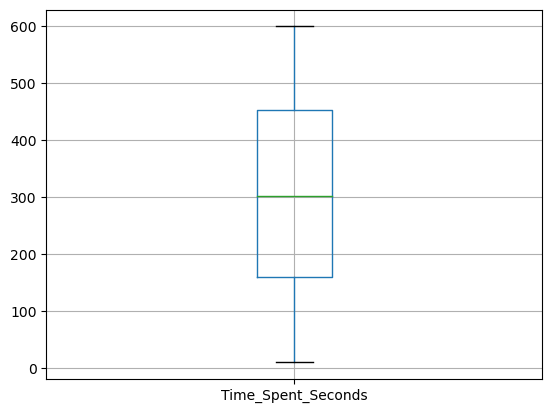

In [10]:
#checking for the outliers
df1.boxplot(column='Time_Spent_Seconds')
plt.show()

In [11]:
counts=df1['Page_Viewed'].value_counts()
counts

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

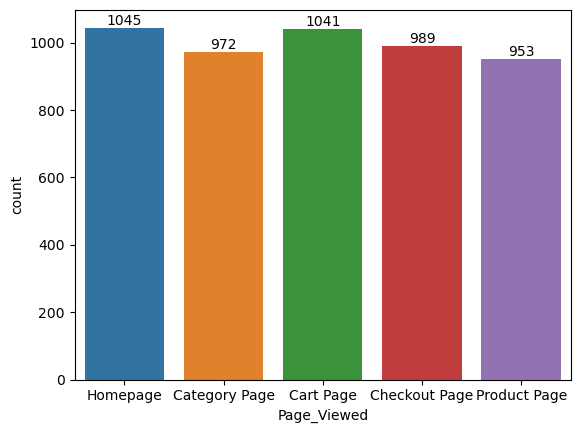

In [17]:
ax=sns.countplot(x='Page_Viewed',data=df1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

NOW checking and reviewing second data set

In [59]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,948,3840,19.0,62.843031,2023-04-02 16:35:46
1,905,1846,9.0,21.780079,2023-04-14 16:38:27
2,704,1700,8.0,138.264455,2023-01-21 11:21:31
3,766,4117,15.0,74.991367,2023-01-29 04:44:04
4,36,3053,7.0,162.569998,2023-05-24 03:30:23


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   object 
 1   User_ID             1000 non-null   object 
 2   Product_ID          1000 non-null   object 
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [53]:
# first of all change the user id and product id in the standard format
df2['User_ID'] = df2['User_ID'].str.extract(r'(\d+)')
df2['Product_ID'] = df2['Product_ID'].str.extract(r'(\d+)')
df2['Purchase_ID'] = df2['Purchase_ID'].str.extract(r'(\d+)')

In [54]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,948,3840,19,62.843031,2023-04-02 16:35:46
1,905,1846,9,21.780079,2023-04-14 16:38:27
2,704,1700,8,138.264455,2023-01-21 11:21:31
3,766,4117,15,74.991367,2023-01-29 04:44:04
4,36,3053,7,162.569998,2023-05-24 03:30:23


In [102]:
#now changing the data types of the data to ensure the quality of the product
data_type_conversions = {
   'Purchase_ID': int,
   'User_ID': int,
   'Product_ID': float
    
}
df2=df2.astype(data_type_conversions)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   int32  
 1   User_ID             1000 non-null   int32  
 2   Product_ID          1000 non-null   float64
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
 5   Product_Id          1000 non-null   object 
dtypes: float64(2), int32(2), object(2)
memory usage: 39.2+ KB


In [56]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,948,3840,19.0,62.843031,2023-04-02 16:35:46
1,905,1846,9.0,21.780079,2023-04-14 16:38:27
2,704,1700,8.0,138.264455,2023-01-21 11:21:31
3,766,4117,15.0,74.991367,2023-01-29 04:44:04
4,36,3053,7.0,162.569998,2023-05-24 03:30:23


In [61]:
df2=df2.drop('Product_Id',axis=1)

In [67]:
#CHANGING THE DATE TIME FORMAT OF THE DATA
df2['Purchase_Time']=pd.to_datetime(df2['Purchase_Time'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Purchase_ID         1000 non-null   int32         
 1   User_ID             1000 non-null   int32         
 2   Product_ID          1000 non-null   float64       
 3   Transaction_Amount  1000 non-null   float64       
 4   Purchase_Time       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2)
memory usage: 31.4 KB


In [64]:
df2.describe()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,497.073000,2513.056000,10.726000,106.348744
std,286.093417,1420.089414,5.873621,55.951244
min,1.000000,2.000000,1.000000,10.429825
25%,258.750000,1333.500000,5.000000,58.426058
50%,493.000000,2412.500000,11.000000,102.950857
75%,748.250000,3794.750000,16.000000,157.533495
max,998.000000,4999.000000,20.000000,199.961345


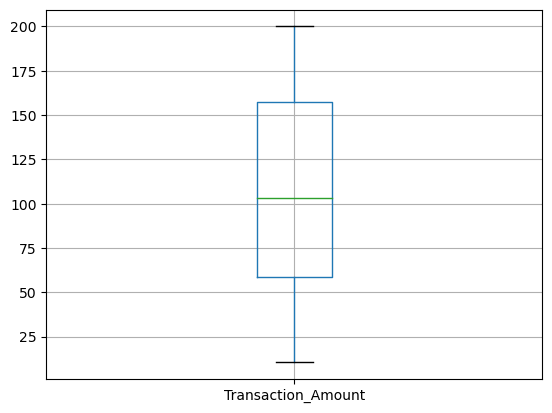

In [65]:
df2.boxplot(column='Transaction_Amount')
plt.show()
#no as such outliers in the data

In [66]:
df3.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            12 non-null     object 
 1   Page_Load_Time   12 non-null     float64
 2   Bounce_Rate      12 non-null     float64
 3   Conversion_Rate  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 512.0+ bytes


In [72]:
df3['Month']=pd.to_datetime(df3['Month'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            12 non-null     datetime64[ns]
 1   Page_Load_Time   12 non-null     float64       
 2   Bounce_Rate      12 non-null     float64       
 3   Conversion_Rate  12 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 512.0 bytes


In [75]:
df3.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


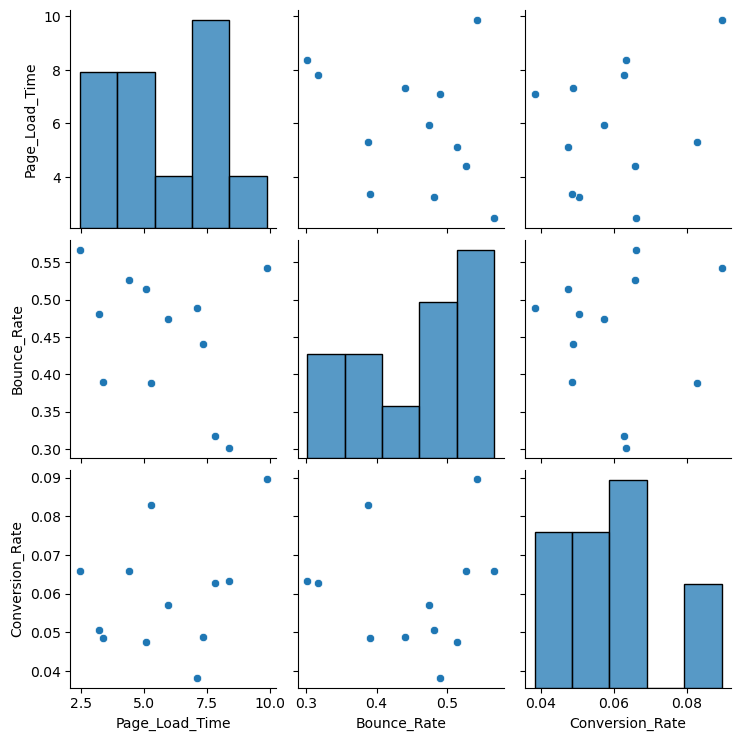

In [76]:
sns.pairplot(df3)
plt.show()

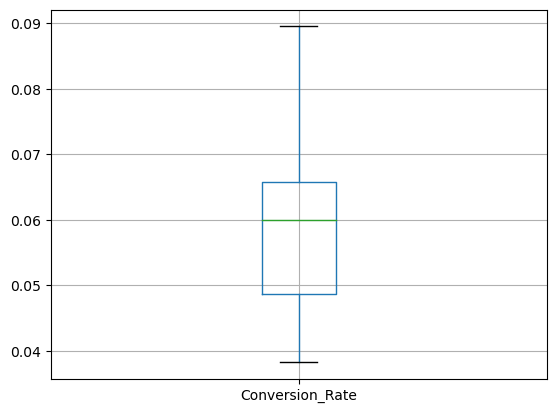

In [78]:
df3.boxplot(column='Conversion_Rate')
plt.show()

In [79]:
df3.describe()

,Page_Load_Time,Bounce_Rate,Conversion_Rate
count,12.000000,12.000000,12.000000
mean,5.866266,0.452650,0.060056
std,2.288288,0.086482,0.014993
min,2.468395,0.301692,0.038263
25%,4.165375,0.389651,0.048626
50%,5.621936,0.477238,0.059957
75%,7.457142,0.517399,0.065832
max,9.872398,0.566843,0.089525


# User behaviour Analysis


In [80]:
df1.head()

,User_ID,Page_Viewed,Time_Spent_Seconds
0,3198,Homepage,560
1,126,Category Page,168
2,1376,Category Page,122
3,1117,Cart Page,329
4,3683,Category Page,391


In [81]:
counts=df1['Page_Viewed'].value_counts()
counts

Homepage         1045
Cart Page        1041
Checkout Page     989
Category Page     972
Product Page      953
Name: Page_Viewed, dtype: int64

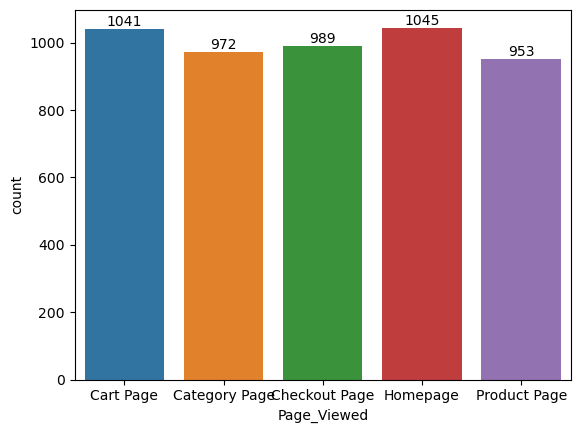

In [82]:
ax=sns.countplot(x='Page_Viewed',data=df1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
#this shows most of the time page visited

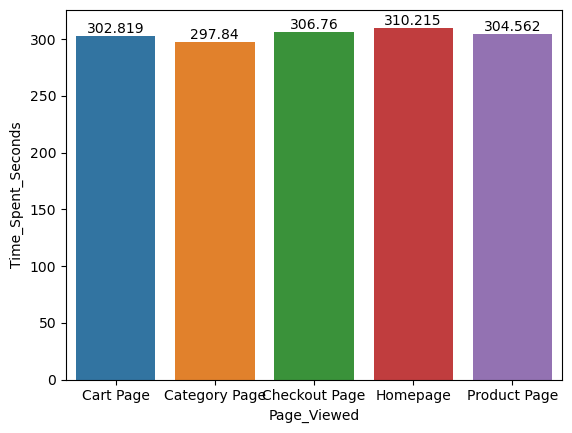

In [86]:
Avg_time_spent=df1.groupby(['Page_Viewed'],as_index=False)['Time_Spent_Seconds'].mean().sort_values(by='Time_Spent_Seconds',ascending=False)
ax=sns.barplot(x='Page_Viewed',y='Time_Spent_Seconds',data=Avg_time_spent)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()
#Average time spent on very page

In [44]:
clicks = df1[df1['Time_Spent_Seconds'] > 0]['User_ID'].count()
impressions = df1['Page_Viewed'].value_counts()
ctr = (clicks / impressions) * 100
ctr.index

Index(['Homepage', 'Cart Page', 'Checkout Page', 'Category Page',
       'Product Page'],
      dtype='object')

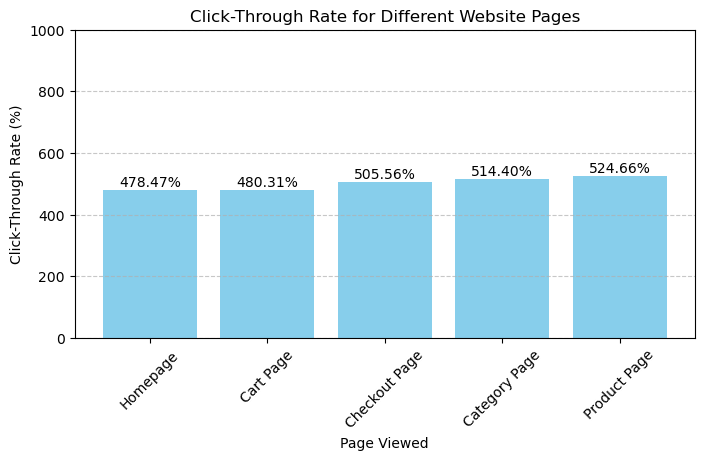

In [48]:
plt.figure(figsize=(8, 4))
plt.bar(ctr.index, ctr.values, color='skyblue')
plt.xlabel('Page Viewed')
plt.ylabel('Click-Through Rate (%)')
plt.title('Click-Through Rate for Different Website Pages')
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with its value
for index, value in enumerate(ctr):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()





# Purchase Analysis


In [57]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Purchase_Time
0,948,3840,19.0,62.843031,2023-04-02 16:35:46
1,905,1846,9.0,21.780079,2023-04-14 16:38:27
2,704,1700,8.0,138.264455,2023-01-21 11:21:31
3,766,4117,15.0,74.991367,2023-01-29 04:44:04
4,36,3053,7.0,162.569998,2023-05-24 03:30:23


In [60]:
df3.sample(5)

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
2,2023-03-01,3.239983,0.480903,0.050514
1,2023-02-01,7.828199,0.317157,0.062764
5,2023-06-01,7.333456,0.440715,0.048687
9,2023-10-01,2.468395,0.566843,0.065971
8,2023-09-01,8.384957,0.301692,0.063365


In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   int32  
 1   User_ID             1000 non-null   int32  
 2   Product_ID          1000 non-null   float64
 3   Transaction_Amount  1000 non-null   float64
 4   Purchase_Time       1000 non-null   object 
dtypes: float64(2), int32(2), object(1)
memory usage: 31.4+ KB


In [68]:
df2['Time'] = df2['Purchase_Time'].dt.time
df2['Purchase_date'] = df2['Purchase_Time'].dt.date

In [72]:
df2=df2.drop('Purchase_Time',axis=1)

In [73]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Time,Purchase_date
0,948,3840,19.0,62.843031,16:35:46,2023-04-02
1,905,1846,9.0,21.780079,16:38:27,2023-04-14
2,704,1700,8.0,138.264455,11:21:31,2023-01-21
3,766,4117,15.0,74.991367,04:44:04,2023-01-29
4,36,3053,7.0,162.569998,03:30:23,2023-05-24


In [104]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Purchase_ID         1000 non-null   int32  
 1   User_ID             1000 non-null   int32  
 2   Product_ID          1000 non-null   float64
 3   Transaction_Amount  1000 non-null   float64
 4   Time                1000 non-null   object 
 5   Purchase_date       1000 non-null   object 
dtypes: float64(2), int32(2), object(2)
memory usage: 39.2+ KB


In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Purchase_ID         1000 non-null   int32         
 1   User_ID             1000 non-null   int32         
 2   Product_ID          1000 non-null   float64       
 3   Transaction_Amount  1000 non-null   float64       
 4   Time                1000 non-null   object        
 5   Purchase_date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(1)
memory usage: 39.2+ KB


In [114]:

df2['Purchase_date']=pd.to_datetime(df2['Purchase_date'])

In [115]:
df2.columns

Index(['Purchase_ID', 'User_ID', 'Product_ID', 'Transaction_Amount', 'Time',
       'Purchase_date'],
      dtype='object')

In [119]:
df2['Product_ID'].nunique()

20

In [118]:
total_unique_users = df2['User_ID'].nunique()

converted_users = df2[df2['Transaction_Amount'] > 0]['Purchase_ID'].nunique()
conversion_rate = (converted_users / total_unique_users) * 100

print(f"Total Unique Users: {total_unique_users}")
print(f"Converted Users: {converted_users}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Total Unique Users: 916
Converted Users: 647
Conversion Rate: 70.63%


In [126]:
product_sales = df2.groupby('Product_ID')['Transaction_Amount'].sum()
top_selling_products = product_sales.sort_values(ascending=False)
print("Top-Selling Products:")
print(top_selling_products.head(20))



Top-Selling Products:
Product_ID
19.0    7125.056901
17.0    6711.316153
13.0    6680.243756
3.0     6375.983900
20.0    6359.302691
8.0     5780.766674
5.0     5697.714155
4.0     5581.543749
7.0     5369.148281
12.0    5363.519340
2.0     5356.732824
18.0    4914.814276
9.0     4851.797823
15.0    4849.662243
16.0    4602.385993
1.0     4342.883539
11.0    4303.933410
14.0    4212.846576
10.0    4112.039422
6.0     3757.051799
Name: Transaction_Amount, dtype: float64


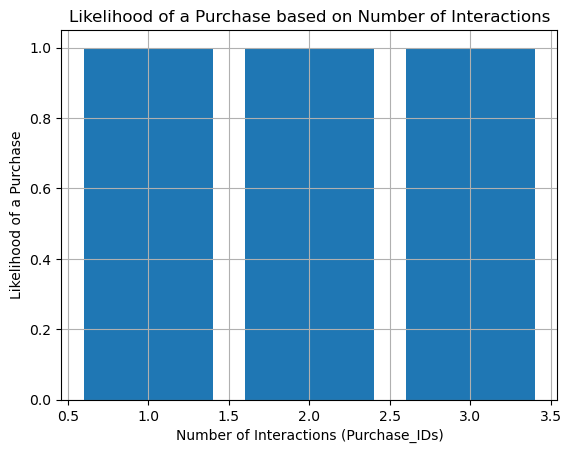

In [136]:
interactions_count = df2.groupby('User_ID')['Purchase_ID'].nunique()

purchase_likelihood = df2.groupby(interactions_count)['Transaction_Amount'].apply(lambda x: (x > 0).mean())

plt.bar(purchase_likelihood.index, purchase_likelihood.values)
plt.xlabel('Number of Interactions (Purchase_IDs)')
plt.ylabel('Likelihood of a Purchase')
plt.title('Likelihood of a Purchase based on Number of Interactions')
plt.grid()
plt.show()

In [137]:
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S')

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Purchase_ID         1000 non-null   int32         
 1   User_ID             1000 non-null   int32         
 2   Product_ID          1000 non-null   float64       
 3   Transaction_Amount  1000 non-null   float64       
 4   Time                1000 non-null   datetime64[ns]
 5   Purchase_date       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int32(2)
memory usage: 39.2 KB


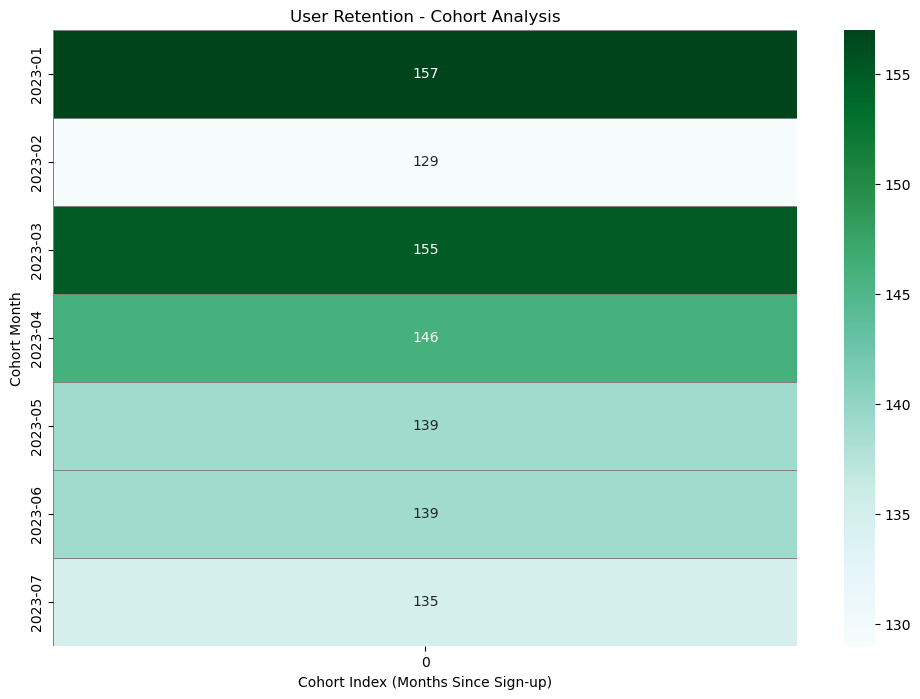

In [149]:
df2['CohortMonth'] = df2['Purchase_date'].dt.to_period('M')
df2['CohortDay'] = df2['Purchase_date'].dt.to_period('D')


df2['CohortIndex'] = df2.groupby(['CohortMonth', 'CohortDay', 'User_ID']).cumcount()

cohort_group = df2.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = cohort_group['Purchase_ID'].count().reset_index()
cohort_data.rename(columns={'Purchase_ID': 'TotalInteractions'}, inplace=True)


retention_table = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='TotalInteractions')


plt.figure(figsize=(12, 8))
plt.title('User Retention - Cohort Analysis')
sns.heatmap(retention_table, annot=True, fmt=".0f", cmap='BuGn', linewidths=0.5, linecolor='gray')
plt.xlabel('Cohort Index (Months Since Sign-up)')
plt.ylabel('Cohort Month')
plt.show()




In [152]:
df2.head()

,Purchase_ID,User_ID,Product_ID,Transaction_Amount,Time,Purchase_date,CohortMonth,CohortDay,CohortIndex
0,948,3840,19.0,62.843031,1900-01-01 16:35:46,2023-04-02,1900-01,2023-04-02,0
1,905,1846,9.0,21.780079,1900-01-01 16:38:27,2023-04-14,1900-01,2023-04-14,0
2,704,1700,8.0,138.264455,1900-01-01 11:21:31,2023-01-21,1900-01,2023-01-21,0
3,766,4117,15.0,74.991367,1900-01-01 04:44:04,2023-01-29,1900-01,2023-01-29,0
4,36,3053,7.0,162.569998,1900-01-01 03:30:23,2023-05-24,1900-01,2023-05-24,0


In [153]:
retention_period = 12
df2['CohortMonth'] = df2['Purchase_date'].dt.to_period('M')
cohort_data = df2.groupby(['CohortMonth', 'User_ID'])['Transaction_Amount'].sum().reset_index()
cohort_data['CohortLifetimeValue'] = cohort_data['Transaction_Amount'] * retention_period
average_ltv_per_cohort = cohort_data.groupby('CohortMonth')['CohortLifetimeValue'].mean()
print(average_ltv_per_cohort)


CohortMonth
2023-01    1265.502024
2023-02    1309.277332
2023-03    1252.221607
2023-04    1305.924565
2023-05    1355.193695
2023-06    1299.703382
2023-07    1319.778232
Freq: M, Name: CohortLifetimeValue, dtype: float64


# Website Performance Optimization:

In [154]:
df3.head()

,Month,Page_Load_Time,Bounce_Rate,Conversion_Rate
0,2023-01-01,5.106652,0.514345,0.047375
1,2023-02-01,7.828199,0.317157,0.062764
2,2023-03-01,3.239983,0.480903,0.050514
3,2023-04-01,5.954509,0.473572,0.057151
4,2023-05-01,9.872398,0.542407,0.089525


In [155]:
df3.columns

Index(['Month', 'Page_Load_Time', 'Bounce_Rate', 'Conversion_Rate'], dtype='object')

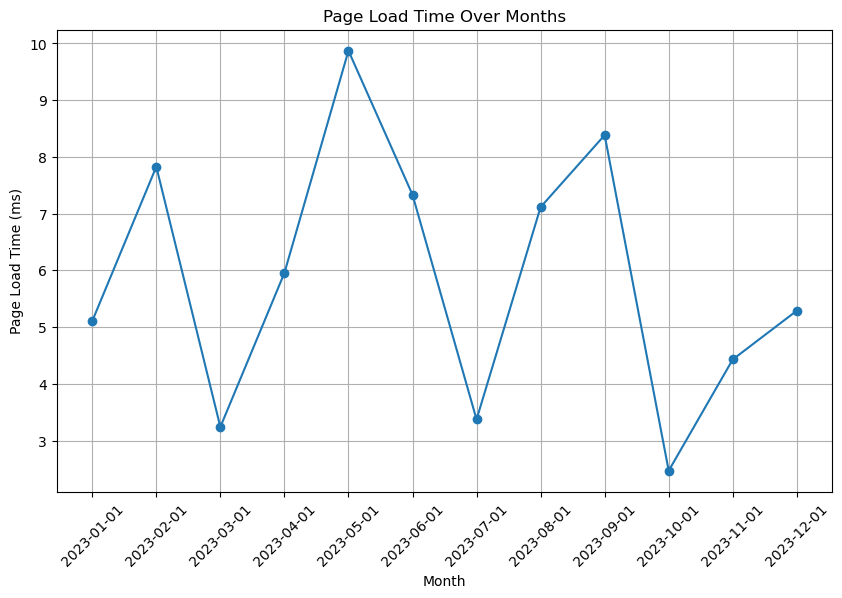

In [157]:
# Plotting Page_Load_Time over months
plt.figure(figsize=(10, 6))
plt.plot(df3['Month'], df3['Page_Load_Time'], marker='o')
plt.xlabel('Month')
plt.ylabel('Page Load Time (ms)')
plt.title('Page Load Time Over Months')
plt.xticks(rotation=45)
plt.grid()
plt.show()





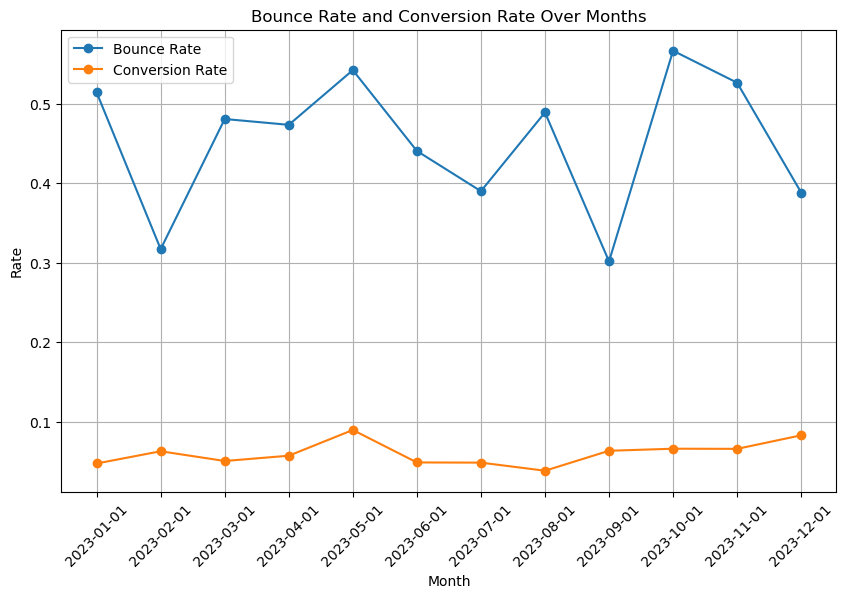

In [159]:
# Plotting Bounce_Rate and Conversion_Rate over months
plt.figure(figsize=(10, 6))
plt.plot(df3['Month'], df3['Bounce_Rate'], marker='o', label='Bounce Rate')
plt.plot(df3['Month'], df3['Conversion_Rate'], marker='o', label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.title('Bounce Rate and Conversion Rate Over Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [161]:
# Calculate correlation matrix
correlation_matrix = df3[['Page_Load_Time', 'Bounce_Rate', 'Conversion_Rate']].corr()

# Display the correlation matrix
print(correlation_matrix)


                 Page_Load_Time  Bounce_Rate  Conversion_Rate
Page_Load_Time         1.000000    -0.311752         0.290803
Bounce_Rate           -0.311752     1.000000         0.025778
Conversion_Rate        0.290803     0.025778         1.000000
